# 全点間最短路とFloyd-Warshall法

全点間最短路問題と，その解法として有名なFloyd-Warshall法を紹介する．

## 全点間最短路問題

全点間最短路問題の説明の前に，完全有向グラフを定義する．

ここでは，頂点集合$V(G)$，枝集合$E(G) = \{(v, w) : v, w \in V(G), \ v \neq w\}$で定義される有向グラフを完全有向グラフと定義する．

以上の準備のもとに，ここでは，全点間最短路問題を，以下の入力と出力で定義する．

- 入力: 完全有向グラフ$G$，枝重み$w \colon E(G) \to \mathbb{R}$
- 出力: 全点間最短路長$d \colon V(G) \times V(G) \to \mathbb{R}$

ただし，枝重みは「与えられた有向グラフに負の重みの閉路が存在しないように」与えられているとする．

一般に，全点間最短路問題は，完全とは限らない有向グラフ上で定義されることが多い．
しかしここでは説明の簡単のため，入力を完全有向グラフに限った．
完全とは限らない有向グラフが入力として与えられた場合には，存在しない枝の重みを完全有向グラフにおいて$\infty$にすればよい．

また一般に，全点間最短路問題の出力は，それぞれの頂点対の最短路であることが多い．
しかしここでは説明の簡単のため，出力を最短路長のみに限定した．
全点対に関する最短路長が一旦わかれば，数値誤差の範囲で，最短路そのものも容易に構成できる．

以降は全点間最短路問題の入力として

$V(G) = \{1, 2, 3, 4\}, \ E(G) = \{(1, 2), \ (2, 1), \ (1, 3), \ (3, 1), \ (1, 4), \ (4, 1), \ (2, 3), \ (3, 2), \ (2, 4), \ (4, 2), \ (3, 4), \ (4, 3)\}$
$w((1,2)) = w((2,1)) = 2, \ w((1,3)) = w((3,1)) = 5, \ w((1,4)) = w((4,1)) = 1, \ w((2,3)) = w((3,2)) = 8, \ w((2,4)) = w((4,2)) = 4, \ w((3,4)) = w((4,3)) = 1$

を例に説明する．

なお，この例は

杉原厚吉，データ構造とアルゴリズム，共立出版，2001．

の図8.3からの引用である．

## NetworkXの利用

Pythonで実装された，ネットワーク解析パッケージとして有名なものにNetworkXがある．

まず，NetworkXを用いて全点間最短路問題を解いてみる．

In [1]:
import networkx as nx # NetworkXをnxとしてimportする．
#import random


先程の入力例をNetworkXのDiGraph（有向グラフ）として用意する．

In [2]:
G = nx.DiGraph() # 有向グラフをGとする．
G.add_node(1, position=(0,0)) # Gに名前が「1」の頂点を追加し，その属性として「'position'が(0, 0)」を付加する．
G.add_node(2, position=(2,1)) # 以下同様である．
G.add_node(3, position=(2,-1))
G.add_node(4, position=(1,0))
G.add_edge(1, 2, weight=2) # Gに頂点「1」から頂点「2」への有向枝を追加し，その属性として「'weight'が2」を付加する．
G.add_edge(2, 1, weight=2) # Gに頂点「2」から頂点「1」への有向枝を追加し，その属性として「'weight'が2」を付加する．
G.add_edge(1, 3, weight=5) # 以下同様である．
G.add_edge(3, 1, weight=5)
G.add_edge(1, 4, weight=1)
G.add_edge(4, 1, weight=1)
G.add_edge(2, 3, weight=8)
G.add_edge(3, 2, weight=8)
G.add_edge(2, 4, weight=4)
G.add_edge(4, 2, weight=4)
G.add_edge(3, 4, weight=1)
G.add_edge(4, 3, weight=1)

用意したグラフを図示する．

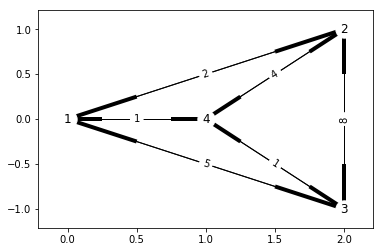

In [3]:
%matplotlib inline
position = nx.get_node_attributes(G, 'position')
nx.draw_networkx(G, pos=position, node_color='w')
edge_labels = nx.draw_networkx_edge_labels(G, pos=position, edge_labels=nx.get_edge_attributes(G, 'weight'))

Networkxを用いて全点間最短路長を求める．

Networkxには全点間最短路長を返す関数floyd_warshallが用意されているので，それを使うだけである．

In [4]:
all_pairs_shortest_path_length = nx.floyd_warshall(G)

関数floyd_warshallの第1引数は入力のグラフであり，第2引数は枝属性の「何を」枝の重みと見るかである．

なお，関数floyd_warshallに与えるグラフは完全有向グラフでなくても構わず，有向グラフでなくても構わない．
無向グラフが与えられた場合には，双方向の有向枝を持つグラフとして全点間最短路長が計算される．

出力の全点間最短路長を表示すると以下の通りである．

In [5]:
all_pairs_shortest_path_length

{1: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>>,
             {1: 0, 2: 2, 3: 2, 4: 1}),
 2: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>>,
             {1: 2, 2: 0, 3: 4, 4: 3}),
 3: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>>,
             {1: 2, 2: 4, 3: 0, 4: 1}),
 4: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>>,
             {1: 1, 2: 3, 3: 1, 4: 0})}

全点間最短路長は辞書として返される．
少々見にくいので，見やすく表示してみる．

In [6]:
for v in G.nodes():
    for w in G.nodes():
        print('Shortest path distance from {0} to {1} is {2}'.format(v, w, all_pairs_shortest_path_length[v][w]))

Shortest path distance from 1 to 1 is 0
Shortest path distance from 1 to 2 is 2
Shortest path distance from 1 to 3 is 2
Shortest path distance from 1 to 4 is 1
Shortest path distance from 2 to 1 is 2
Shortest path distance from 2 to 2 is 0
Shortest path distance from 2 to 3 is 4
Shortest path distance from 2 to 4 is 3
Shortest path distance from 3 to 1 is 2
Shortest path distance from 3 to 2 is 4
Shortest path distance from 3 to 3 is 0
Shortest path distance from 3 to 4 is 1
Shortest path distance from 4 to 1 is 1
Shortest path distance from 4 to 2 is 3
Shortest path distance from 4 to 3 is 1
Shortest path distance from 4 to 4 is 0


まだ見にくいので，以下左図に入力例，右図に出力例を示す．

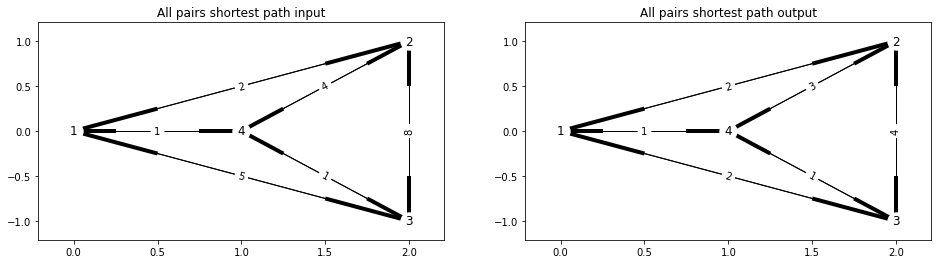

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(16, 4))
position = nx.get_node_attributes(G, 'position')
plt.subplot(1, 2, 1)
plt.title('All pairs shortest path input')
nx.draw_networkx(G, pos=position, node_color='w')
edge_labels = nx.draw_networkx_edge_labels(G, pos=position, edge_labels=nx.get_edge_attributes(G, 'weight'))

plt.subplot(1, 2, 2)
plt.title('All pairs shortest path output')
nx.draw_networkx(G, pos=position, node_color='w')

edge_labels = nx.draw_networkx_edge_labels(G, pos=position, edge_labels={e: all_pairs_shortest_path_length[e[0]][e[1]] for e in G.edges()})

## Floyd-Warshall法

NetworkXは便利である．
しかし，完成されたパッケージなので細か所までカスタマイズできるとは限らない．

全点間最短路問題に対する解法として有名なFloyd-Warshall法を説明し，実装する．

以下では説明の簡単のため，頂点の名前は自然数$1, 2, \dots, n$であるとする．

Floyd-Warshall法の考え方は単純であり，大雑把に言うと，以下の通りである．


- 最初は，それぞれの頂点$i, j$に関して，暫定的に最短路長$d(i, j) = l((i, j))$とする．
- $k = 1, 2, \dots, n$に関して以下を繰り返す．
  - 全頂点対$(i, j) \in \{1, \dots, n\} \times \{1, \dots, n\}$に関して以下を繰り返す．
    - 頂点部分集合$\{1, \dots, k\}$のみを経由して得られる，$i$から$j$への最短路長を$d(i, j)$とする．

この手続きを繰り返すと，最後$k = n$のときには

全頂点対$(i, j) \in \{1, \dots, n\} \times \{1, \dots, n\}$に関して
「$\{1, \dots, n\}$のみ（つまりすべての頂点集合）を経由して得られる，$i$から$j$への最短路長を$d(i, j)$とする．」

となる．
これは最短路長の定義そのものと言ってもいいので，最短路長が正しく求まるのは当たり前である．

アルゴリズムを具体的に記述する際には「$\{1, \dots, k\}$のみを経由して得られる，$i$から$j$への最短路長を$d(i, j)$とする」の部分が自明ではない．

しかし，最短路長に関する以下の事実（それは原理と言っても良い）を使うとアルゴリズムをより具体的に記述できる．

- どの全頂点対$(i, j) \in \{1, \dots, n\} \times \{1, \dots, n\}$に関しても，「$\{1, \dots, k\}$のみを経由して得られる，$i$から$j$への最短路長」は「$\{1, \dots, k+1\}$のみを経由して得られる，$i$から$j$への最短路長」以上である．

経由して良い頂点が増えているのだから，最短路長がより長くならないのは当たり前である．

この事実を利用し，「$\{1, \dots, k\}$のみを経由して得られる，$i$から$j$への最短路長」を$d_k(i, j)$と記すことにすると，先程の手続きは以下の通り書き直せる．
なお，便宜的に$d_0(i, j)$を「どこも経由せずに$i$から$j$へ直接行く最短路長」とする．

- それぞれの頂点$i, j$に関して，$d_0(i, j) = l((i, j))$とする．
- $k = 1, 2, \dots, n$に関して以下を繰り返す．
  - 全頂点対$(i, j) \in \{1, \dots, n\} \times \{1, \dots, n\}$に関して以下を繰り返す．
    - $d_k(i, j) = \min\{d_{k-1}(i, j), \ d_{k-1}(i, k) + d_{k-1}(k, j)\}$とする．
    
この手続きがFloyd-Warshall法である．

以下に，まず，networkxのデータ構造を使って，Floyd-Warshall法を関数として定義する．

In [8]:
def floyd_warshall_with_networkx(G):
    d = {i: {j: 0 for j in G.nodes()} for i in G.nodes()}
    for i, j in G.edges():
        d[i][j] = G.edge[i][j]['weight']
    for i in G.nodes():
        d[i][i] = 0
    for k in G.nodes():
        for i in G.nodes():
            for j in G.nodes():
                d[i][j] = min(d[i][j], d[i][k] + d[k][j])
    return d

In [9]:
all_pairs_shortest_distance = floyd_warshall_with_networkx(G)

In [10]:
all_pairs_shortest_distance

{1: {1: 0, 2: 2, 3: 2, 4: 1},
 2: {1: 2, 2: 0, 3: 4, 4: 3},
 3: {1: 2, 2: 4, 3: 0, 4: 1},
 4: {1: 1, 2: 3, 3: 1, 4: 0}}

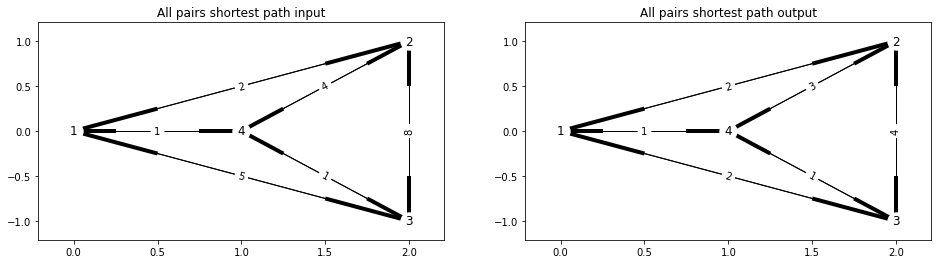

In [11]:
%matplotlib inline
plt.figure(figsize=(16, 4))
position = nx.get_node_attributes(G, 'position')

plt.subplot(1, 2, 1)
plt.title('All pairs shortest path input')
nx.draw_networkx(G, pos=position, node_color='w')
edge_labels = nx.draw_networkx_edge_labels(G, pos=position, edge_labels=nx.get_edge_attributes(G, 'weight'))

plt.subplot(1, 2, 2)
plt.title('All pairs shortest path output')
nx.draw_networkx(G, pos=position, node_color='w')

edge_labels = nx.draw_networkx_edge_labels(G, pos=position, edge_labels={e: all_pairs_shortest_distance[e[0]][e[1]] for e in G.edges()})

例えば，多くのプログラミングコンテストなどではnetworkxは使えない．
コンテストで競って欲しい部分が，そのまま関数で実装されていたりするからである．

また，細かいところまでカスタマイズしたいなどの理由でnetworkxを使えないかもしれない．

そのような場合に備えて，以下では，networkxを使わない実装を試みる．

上記のfloyd_warshall_with_networkxでnetworkxを使っている部分は，

- G.nodes()で有向グラフ$G$の頂点集合を返してもらう，
- G.edges()で有向グラフ$G$の枝集合を返してもらう，
- G.edge[i][j]['weight']で枝$(i, j)$の重みを返してもらう，

の3種類だけである．
しかも，最後の１つはその１つ手前と一緒に使うだけなので，

- グラフの頂点集合をリストで保存し，
- グラフの枝集合を辞書で保存し，キーを枝の名前，値を枝重みで保存，

すれば十分である．
Pythonのクラスを用いれば，より可読性が増すが，ここでは扱わないことにする．

In [12]:
graph_node = G.nodes()
graph_edge = {e: G.edge[e[0]][e[1]]['weight'] for e in G.edges()}

In [13]:
graph_node

[1, 2, 3, 4]

In [14]:
graph_edge

{(1, 2): 2,
 (1, 3): 5,
 (1, 4): 1,
 (2, 1): 2,
 (2, 3): 8,
 (2, 4): 4,
 (3, 1): 5,
 (3, 2): 8,
 (3, 4): 1,
 (4, 1): 1,
 (4, 2): 4,
 (4, 3): 1}

In [15]:
def floyd_warshall_for_complete_graph(graph_node, graph_edge):
    d = {i: {j: 0 for j in graph_node} for i in graph_node}
    for tail, head in graph_edge:
        d[tail][head] = graph_edge[(tail, head)]
    for i in graph_node:
        d[i][i] = 0
    for k in graph_node:
        for i in graph_node:
            for j in graph_node:
                d[i][j] = min(d[i][j], d[i][k] + d[k][j])
    return d

In [16]:
all_pairs_shortest_distance = floyd_warshall_for_complete_graph(graph_node, graph_edge)

In [17]:
all_pairs_shortest_distance

{1: {1: 0, 2: 2, 3: 2, 4: 1},
 2: {1: 2, 2: 0, 3: 4, 4: 3},
 3: {1: 2, 2: 4, 3: 0, 4: 1},
 4: {1: 1, 2: 3, 3: 1, 4: 0}}

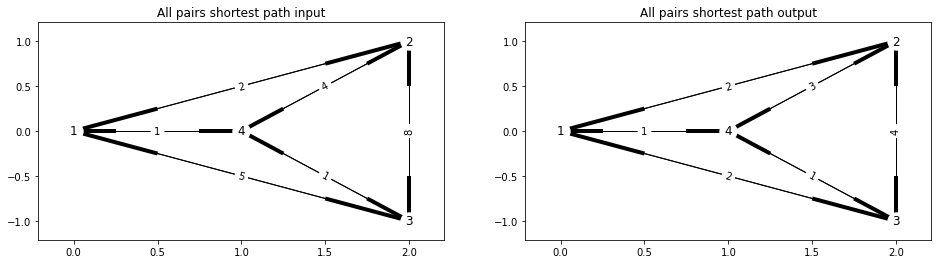

In [18]:
%matplotlib inline
plt.figure(figsize=(16, 4))
position = nx.get_node_attributes(G, 'position')

plt.subplot(1, 2, 1)
plt.title('All pairs shortest path input')
nx.draw_networkx(G, pos=position, node_color='w')
edge_labels = nx.draw_networkx_edge_labels(G, pos=position, edge_labels=nx.get_edge_attributes(G, 'weight'))

plt.subplot(1, 2, 2)
plt.title('All pairs shortest path output')
nx.draw_networkx(G, pos=position, node_color='w')

edge_labels = nx.draw_networkx_edge_labels(G, pos=position, edge_labels={e: all_pairs_shortest_distance[e[0]][e[1]] for e in G.edges()})